Classification Report:
               precision    recall  f1-score   support

    negative       0.86      1.00      0.92         6
    positive       1.00      1.00      1.00         7
     neutral       1.00      0.86      0.92         7

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20



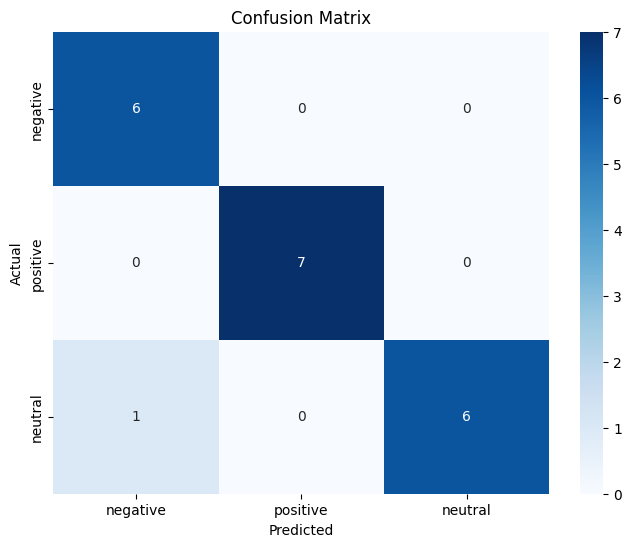

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv("data.csv")

# Step 1: Preprocess the data
data['Sentiment'] = data['Sentiment'].map({'positive': 1, 'negative': 0, 'neutral': 2})

# Step 2: Split the dataset
X = data['Review']
y = data['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 4: Train a classification model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test_tfidf)
report = classification_report(y_test, y_pred, target_names=['negative', 'positive', 'neutral'])

# Print the classification report
print("Classification Report:\n", report)

# Step 6: Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'positive', 'neutral'], yticklabels=['negative', 'positive', 'neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
